In [1]:
import yfinance as yf
from math import log, sqrt, pi, exp
from datetime import datetime, date, timedelta
import numpy as np
import pandas as pd
from pandas import DataFrame

In [2]:
# column_names = ["QUOTE_UNIXTIME", "QUOTE_READTIME", "QUOTE_DATE", "QUOTE_TIME_HOURS", "UNDERLYING_LAST", "EXPIRE_DATE", "EXPIRE_UNIX", "DTE", "C_DELTA", "C_GAMMA", "C_VEGA", "C_THETA", "C_RHO", "C_IV", "C_VOLUME", "C_LAST", "C_SIZE", "C_BID", "C_ASK", "STRIKE", "P_BID", "P_ASK", "P_SIZE", "P_LAST", "P_DELTA", "P_GAMMA", "P_VEGA", "P_THETA", "P_RHO", "P_IV", "P_VOLUME", "STRIKE_DISTANCE", "STRIKE_DISTANCE_PCT"]

aapl_path_list = ["data/aapl_q1/aapl_eod_202201.txt", "data/aapl_q1/aapl_eod_202202.txt", 
             "data/aapl_q1/aapl_eod_202203.txt", "data/aapl_q2_q3/aapl_eod_202204.txt", 
             "data/aapl_q2_q3/aapl_eod_202205.txt", "data/aapl_q2_q3/aapl_eod_202206.txt", 
             "data/aapl_q2_q3/aapl_eod_202207.txt", "data/aapl_q2_q3/aapl_eod_202208.txt", 
             "data/aapl_q2_q3/aapl_eod_202209.txt", "data/aapl_q4/aapl_eod_202210.txt", 
             "data/aapl_q4/aapl_eod_202211.txt", "data/aapl_q4/aapl_eod_202212.txt"]

df_aapl = pd.DataFrame()
for path in aapl_path_list:
    dat = pd.read_csv(path, sep = ",")
    df_aapl = pd.concat([df_aapl, dat])
df_aapl

df_aapl = df_aapl.rename(columns={'[QUOTE_UNIXTIME]':"quote_unixtime",
 ' [QUOTE_READTIME]':"quote_readtime",
 ' [QUOTE_DATE]':'quote_date',
 ' [QUOTE_TIME_HOURS]': "quote_time_hours",
 ' [UNDERLYING_LAST]': 'underlying_last',
 ' [EXPIRE_DATE]':'expire_date',
 ' [EXPIRE_UNIX]':'expire_unix',
 ' [DTE]':'dte',
 ' [C_DELTA]':'c_delta',
 ' [C_GAMMA]':'c_gamma',
 ' [C_VEGA]':'c_vega',
 ' [C_THETA]':'c_theta',
 ' [C_RHO]':'c_rho',
 ' [C_IV]': 'c_iv',
 ' [C_VOLUME]':'c_volume',
 ' [C_LAST]':'c_last',
 ' [C_SIZE]':'c_size',
 ' [C_BID]':'c_bid',
 ' [C_ASK]':'c_ask',
 ' [STRIKE]':'strike',
 ' [P_BID]':'p_bid',
 ' [P_ASK]':'p_ask',
 ' [P_SIZE]':'p_size',
 ' [P_LAST]':'p_last',
 ' [P_DELTA]':'p_delta',
 ' [P_GAMMA]':'p_gamma',
 ' [P_VEGA]':'p_vega',
 ' [P_THETA]':'p_theta',
 ' [P_RHO]':'p_rho',
 ' [P_IV]':'p_iv',
 ' [P_VOLUME]':'p_volume',
 ' [STRIKE_DISTANCE]':'strike_distance',
 ' [STRIKE_DISTANCE_PCT]': 'strike_distance_pct'})
 
df_aapl['quote_date'] =  pd.to_datetime(df_aapl['quote_date'])
df_aapl

C:\Users\alexn\AppData\Local\Temp\ipykernel_28064\180158175.py:12: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv(path, sep = ",")
C:\Users\alexn\AppData\Local\Temp\ipykernel_28064\180158175.py:12: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv(path, sep = ",")
C:\Users\alexn\AppData\Local\Temp\ipykernel_28064\180158175.py:12: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv(path, sep = ",")
C:\Users\alexn\AppData\Local\Temp\ipykernel_28064\180158175.py:12: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv(path, sep = ",")
C:\Users\alexn\AppData\Local\Temp\ipykernel_28064\180158175.py:12: DtypeWarning: Columns (15,17,18,20,21,23) have mixed 

,quote_unixtime,quote_readtime,quote_date,quote_time_hours,underlying_last,expire_date,expire_unix,dte,c_delta,c_gamma,...,p_last,p_delta,p_gamma,p_vega,p_theta,p_rho,p_iv,p_volume,strike_distance,strike_distance_pct
0,1641243600,2022-01-03 16:00,2022-01-03,16.0,181.96,2022-01-07,1641589200,4.0,1.00000,0.00000,...,0.010000,-0.00092,0.00011,-0.00002,-0.00443,-0.00033,1.524630,0.000000,77.0,0.423
1,1641243600,2022-01-03 16:00,2022-01-03,16.0,181.96,2022-01-07,1641589200,4.0,1.00000,0.00000,...,0.010000,-0.00094,0.00011,0.00066,-0.00442,0.00000,1.402750,0.000000,72.0,0.395
2,1641243600,2022-01-03 16:00,2022-01-03,16.0,181.96,2022-01-07,1641589200,4.0,1.00000,0.00000,...,0.010000,-0.00050,0.00006,0.00040,-0.00419,-0.00023,1.286100,0.000000,67.0,0.368
3,1641243600,2022-01-03 16:00,2022-01-03,16.0,181.96,2022-01-07,1641589200,4.0,1.00000,0.00000,...,0.010000,-0.00061,0.00014,0.00050,-0.00413,0.00000,1.174420,0.000000,62.0,0.341
4,1641243600,2022-01-03 16:00,2022-01-03,16.0,181.96,2022-01-07,1641589200,4.0,1.00000,0.00000,...,0.010000,-0.00088,0.00015,0.00012,-0.00381,-0.00027,1.066280,0.000000,57.0,0.313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21201,1672434000,2022-12-30 16:00,2022-12-30,16.0,129.94,2025-01-17,1737147600,749.0,0.07677,0.00259,...,122.0,-1.00000,0.00000,0.00000,0.00000,0.00000,,0.000000,150.1,1.155
21202,1672434000,2022-12-30 16:00,2022-12-30,16.0,129.94,2025-01-17,1737147600,749.0,0.06462,0.00238,...,143.6,-0.77345,0.00416,0.36825,-0.00874,-0.91655,0.539470,0.000000,155.1,1.193
21203,1672434000,2022-12-30 16:00,2022-12-30,16.0,129.94,2025-01-17,1737147600,749.0,0.06607,0.00230,...,151.26,-1.00000,0.00000,0.00000,0.00000,0.00000,,0.000000,160.1,1.232
21204,1672434000,2022-12-30 16:00,2022-12-30,16.0,129.94,2025-01-17,1737147600,749.0,0.05936,0.00208,...,151.37,-1.00000,0.00000,0.00000,0.00000,0.00000,,0.000000,170.1,1.309


In [3]:
path_list_qqq = ["data/qqq_q1/qqq_eod_202201.txt", "data/qqq_q1/qqq_eod_202202.txt", 
                 "data/qqq_q1/qqq_eod_202203.txt", "data/qqq_q2/qqq_eod_202204.txt", 
                 "data/qqq_q2/qqq_eod_202205.txt", "data/qqq_q2/qqq_eod_202206.txt",
                 "data/qqq_q3/qqq_eod_202207.txt", "data/qqq_q3/qqq_eod_202208.txt",
                 "data/qqq_q3/qqq_eod_202209.txt", "data/qqq_q4/qqq_eod_202210.txt",
                 "data/qqq_q4/qqq_eod_202211.txt", "data/qqq_q4/qqq_eod_202212.txt"]
df_qqq = pd.DataFrame()
for path in path_list_qqq:
    dat = pd.read_csv(path, sep = ",")
    df_qqq = pd.concat([df_qqq, dat])
df_qqq.head()

df_qqq = df_qqq.rename(columns={'[QUOTE_UNIXTIME]':"quote_unixtime",
 ' [QUOTE_READTIME]':"quote_readtime",
 ' [QUOTE_DATE]':'quote_date',
 ' [QUOTE_TIME_HOURS]': "quote_time_hours",
 ' [UNDERLYING_LAST]': 'underlying_last',
 ' [EXPIRE_DATE]':'expire_date',
 ' [EXPIRE_UNIX]':'expire_unix',
 ' [DTE]':'dte',
 ' [C_DELTA]':'c_delta',
 ' [C_GAMMA]':'c_gamma',
 ' [C_VEGA]':'c_vega',
 ' [C_THETA]':'c_theta',
 ' [C_RHO]':'c_rho',
 ' [C_IV]': 'c_iv',
 ' [C_VOLUME]':'c_volume',
 ' [C_LAST]':'c_last',
 ' [C_SIZE]':'c_size',
 ' [C_BID]':'c_bid',
 ' [C_ASK]':'c_ask',
 ' [STRIKE]':'strike',
 ' [P_BID]':'p_bid',
 ' [P_ASK]':'p_ask',
 ' [P_SIZE]':'p_size',
 ' [P_LAST]':'p_last',
 ' [P_DELTA]':'p_delta',
 ' [P_GAMMA]':'p_gamma',
 ' [P_VEGA]':'p_vega',
 ' [P_THETA]':'p_theta',
 ' [P_RHO]':'p_rho',
 ' [P_IV]':'p_iv',
 ' [P_VOLUME]':'p_volume',
 ' [STRIKE_DISTANCE]':'strike_distance',
 ' [STRIKE_DISTANCE_PCT]': 'strike_distance_pct'})

df_qqq.quote_date = pd.to_datetime(df_qqq['quote_date'])

C:\Users\alexn\AppData\Local\Temp\ipykernel_28064\652817267.py:9: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv(path, sep = ",")
C:\Users\alexn\AppData\Local\Temp\ipykernel_28064\652817267.py:9: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv(path, sep = ",")
C:\Users\alexn\AppData\Local\Temp\ipykernel_28064\652817267.py:9: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv(path, sep = ",")
C:\Users\alexn\AppData\Local\Temp\ipykernel_28064\652817267.py:9: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv(path, sep = ",")
C:\Users\alexn\AppData\Local\Temp\ipykernel_28064\652817267.py:9: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types

In [4]:
def get_closing(start_date, end_date):
    tickers = ['QQQ', 'QQQ']
    data = yf.download(tickers, start=start_date, end=end_date)
    last_quote = data['Close']
    return last_quote

closing_data = get_closing('2022-01-01', '2022-12-31')
closing_data.head()
closing_data.to_csv('data/closing.csv', index = True)

[*********************100%***********************]  2 of 2 completed


In [5]:
# store the implied volatility of apple and qqq for that dte
# signal ratio = apple implied volatility / qqq implied volatility

def signal_ratio(index, df_aapl, df_qqq):
    aapl_iv = 0.5 * (df_aapl.iloc[[index]].c_iv + df_aapl.iloc[[index]].p_iv)
    qqq_iv = 0.5 * (df_qqq.iloc[[index]].c_iv + df_qqq.iloc[[index]].p_iv)
    return aapl_iv / qqq_iv
    

In [6]:
closing_data = pd.read_csv("data/closing.csv")
# closing_data.head()
closing_data.Date = pd.to_datetime(closing_data.Date)
dates = closing_data.Date.drop_duplicates().tolist()

best_aapl_dte = []
best_aapl_strike = []
best_aapl_c_delta = []
best_aapl_p_delta = []
best_aapl_c_volume = []
best_aapl_p_volume = []
best_aapl_c_iv = []
best_aapl_p_iv = []

best_qqq_dte = []
best_qqq_strike = []
best_qqq_c_delta = []
best_qqq_p_delta = []
best_qqq_c_volume = []
best_qqq_p_volume = []
best_qqq_c_iv = []
best_qqq_p_iv = []


for d in dates:
    day_text = d.strftime("%Y-%m-%d")
    closing_qqq_date = closing_data[closing_data.Date == day_text]["QQQ"]
    closing_aapl_date = closing_data[closing_data.Date == day_text]["QQQ"]
    print ("<{}>".format(df_qqq.columns[1]))
    date_qqq_df = df_qqq[(df_qqq['quote_date'] == day_text) & 
                         (df_qqq.dte >= 21) & 
                         (df_qqq.dte <= 35)]
    date_aapl_df = df_aapl[(df_aapl['quote_date'] == day_text) & 
                         (df_aapl.dte >= 21) & 
                         (df_aapl.dte <= 35)]
    

    
    best_aapl = None
    best_aapl_dif = 10000
    
    for opt in range(len(date_aapl_df.index)):
        dif = abs(date_aapl_df.strike.iloc[opt] - closing_aapl_date.iloc[0])
        if dif < best_aapl_dif:
            best_aapl_dif = dif
            best_aapl = date_aapl_df.iloc[opt]
    
    if best_aapl is not None:
        best_aapl_dte.append(best_aapl.dte)
        best_aapl_strike.append(best_aapl.strike)
        best_aapl_c_delta.append(best_aapl.c_delta)
        best_aapl_p_delta.append(best_aapl.p_delta)
        best_aapl_c_volume.append(best_aapl.c_volume)
        best_aapl_p_volume.append(best_aapl.p_volume)
        best_aapl_c_iv.append(best_aapl.c_iv)
        best_aapl_p_iv.append(best_aapl.p_iv)
    else:
        best_aapl_dte.append(None)
        best_aapl_strike.append(None)
        best_aapl_c_delta.append(None)
        best_aapl_p_delta.append(None)
        best_aapl_c_volume.append(None)
        best_aapl_p_volume.append(None)
        best_aapl_c_iv.append(None)
        best_aapl_p_iv.append(None)
    
    
    best_qqq = None
    best_qqq_dif = 10000
    
    for opt in range(len(date_qqq_df.index)):
        dif = abs(date_qqq_df.strike.iloc[opt] - closing_qqq_date.iloc[0])
        if dif < best_qqq_dif:
            best_qqq_dif = dif
            best_qqq = date_qqq_df.iloc[opt]
    
    if best_aapl is not None:
        best_qqq_dte.append(best_qqq.dte)
        best_qqq_strike.append(best_qqq.strike)
        best_qqq_c_delta.append(best_qqq.c_delta)
        best_qqq_p_delta.append(best_qqq.p_delta)
        best_qqq_c_volume.append(best_qqq.c_volume)
        best_qqq_p_volume.append(best_qqq.p_volume)
        best_qqq_c_iv.append(best_qqq.c_iv)
        best_qqq_p_iv.append(best_qqq.p_iv)
    else:
        best_qqq_dte.append(None)
        best_qqq_strike.append(None)
        best_qqq_c_delta.append(None)
        best_qqq_p_delta.append(None)
        best_qqq_c_volume.append(None)
        best_qqq_p_volume.append(None)
        best_qqq_c_iv.append(None)
        best_qqq_p_iv.append(None)
    
closest_options_aapl = pd.DataFrame({"date": dates,
                                     "strike": best_aapl_strike,
                                    "dte":best_aapl_dte,
                                    "c_delta":best_aapl_c_delta,
                                    "p_delta":best_aapl_p_delta,
                                    "c_volume":best_aapl_c_volume,
                                    "p_volume":best_aapl_p_volume,
                                    "c_iv":best_aapl_c_iv,
                                    "p_iv":best_aapl_p_iv
                                    })

closest_options_qqq = pd.DataFrame({"date": dates,
                                     "strike": best_qqq_strike,
                                    "dte":best_qqq_dte,
                                    "c_delta":best_qqq_c_delta,
                                    "p_delta":best_qqq_p_delta,
                                    "c_volume":best_qqq_c_volume,
                                    "p_volume":best_qqq_p_volume,
                                    "c_iv":best_qqq_c_iv,
                                    "p_iv":best_qqq_p_iv
                                    })

<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtime>
<quote_readtim

In [7]:
date_aapl_df
best_aapl['expire_date']
# stock_data = pd.read_csv("data/closing.csv")
# stock_data
# df_aapl

' 2023-01-20'

In [8]:
float(df_aapl[(df_aapl['expire_date'] == ' 2022-09-16') & (df_aapl['strike'] == 150)].iloc[0]['p_delta'])

-0.19266

In [9]:
(datetime(2022,9,16)+timedelta(1)).strftime(" %Y-%m-%d")

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield (start_date + timedelta(n)).strftime(" %Y-%m-%d")

# start_date = date(2013, 1, 1)
# end_date = date(2015, 6, 2)
# for single_date in daterange(start_date, end_date):
#     print(single_date.strftime("%Y-%m-%d"))

stock_data = pd.read_csv("data/closing.csv")
stock_data['Date'].iloc[0]
option = df_aapl[((df_aapl['expire_date'] == datetime(2022,9,16).strftime(" %Y-%m-%d")) & (df_aapl['strike'] == 150) & (df_aapl['quote_date'] == datetime(2022,5,13).strftime(" %Y-%m-%d")))]
len(option)
# a =stock_data[stock_data['Date'] == ((datetime(2022,1,3)).strftime("%Y-%m-%d"))]['QQQ']
# c = stock_data[stock_data['Date'] == ((datetime(2022,9,15)).strftime("%Y-%m-%d"))]['AAPL']
# float(c)


1

In [11]:
# load daily stock closing prices
stock_data = pd.read_csv("data/closing.csv")

def daterange(start_date, end_date,strike):
    for n in range(int((end_date - start_date).days)):
        if len(stock_data[stock_data['Date'] == (start_date + timedelta(n)).strftime("%Y-%m-%d")]['AAPL']) >0:
            if len(df_aapl[((df_aapl['expire_date'] == end_date.strftime(" %Y-%m-%d")) & (df_aapl['strike'] == strike) & (df_aapl['quote_date'] == (start_date + timedelta(n)).strftime(" %Y-%m-%d")))]) > 0:
                yield start_date + timedelta(n)

# initialize the portfolio
# stock_pos is positive if we are long, negative if we are short
# TODO: replace and with &
def runDeltaHedge(optStrike, optExp, entryDate):
    
    entryOption = df_aapl[(df_aapl['expire_date'] == optExp.strftime(" %Y-%m-%d")) & (df_aapl['strike'] == optStrike) & (df_aapl['quote_date'] == entryDate.strftime(" %Y-%m-%d"))]
    entryPutAsk = float(entryOption['p_ask'])
    entryCallAsk = float(entryOption['c_ask'])

    portfolio = {
        "stock_pos": 0.,
        "options_strike": optStrike,
        "option_exp": optExp.strftime(" %Y-%m-%d"),
        "cash_pos": - entryPutAsk - entryCallAsk,
        "delta": 0.
    }
    # print(portfolio)
    # Fix loop
    for day in daterange(entryDate, optExp,optStrike):
        option = df_aapl[(df_aapl['expire_date'] == portfolio['option_exp']) & (df_aapl['strike'] == portfolio['options_strike']) & (df_aapl['quote_date'] == day.strftime(" %Y-%m-%d"))]
        cDelta = float(option['c_delta'])
        pDelta = float(option['p_delta'])
        portfolio['delta'] = 100 * (cDelta + pDelta)
        if(portfolio['delta'] > 1):
            tradeAmt = int(portfolio['delta'])
            portfolio['stock_pos'] -= tradeAmt
            portfolio['cash_pos'] += tradeAmt * float(stock_data[stock_data['Date'] == day.strftime("%Y-%m-%d")]['AAPL'])
        if(portfolio['delta'] < -1):
            tradeAmt = int(-portfolio['delta'])
            portfolio['stock_pos'] += tradeAmt
            portfolio['cash_pos'] -= tradeAmt * float(stock_data[stock_data['Date'] == day.strftime("%Y-%m-%d")]['AAPL'])
        # print(day)
        # print(portfolio)

    #Close Position 
    closeUnderPrice = float(stock_data[stock_data['Date'] == ((optExp-timedelta(1)).strftime("%Y-%m-%d"))]['AAPL'])
    #Close Stock Position
    portfolio['cash_pos'] += portfolio['stock_pos'] * closeUnderPrice

    #Close Option Position
    
    closeOption = df_aapl[(df_aapl['expire_date'] == portfolio['option_exp']) & (df_aapl['strike'] == portfolio['options_strike']) & (df_aapl['quote_date'] == optExp.strftime(" %Y-%m-%d"))]
    closePutBid = float(closeOption['p_bid'])
    closeCallBid = float(closeOption['c_bid'])

    if(closeUnderPrice < portfolio['options_strike']):
        exProfit = 100 * (portfolio['options_strike'] - closeUnderPrice)
        portfolio['cash_pos'] += max(exProfit, closePutBid)
        portfolio['cash_pos'] += closeCallBid
    if(closeUnderPrice > portfolio['options_strike']):
        exProfit = 100 * (closeUnderPrice - portfolio['options_strike'])
        portfolio['cash_pos'] += max(exProfit, closeCallBid)
        portfolio['cash_pos'] += closePutBid

    # print(portfolio)
    return portfolio['cash_pos']
    # return 1.




    



    # Close OPtion Position

    

       


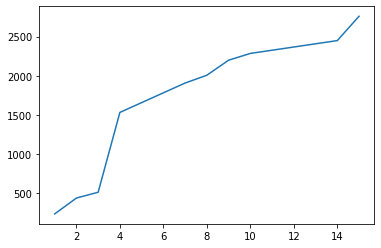

In [12]:
import matplotlib.pyplot as plt

xs=[]
ys=[]
for d in daterange(datetime(2022,9,1),datetime(2022,9,16),150):
  # print(d)
  # print(d.strftime("%Y-%m-%d"))
  # if len(stock_data[stock_data['Date'] == (d.strftime("%Y-%m-%d"))]['AAPL']) > 0:
  xs.append(int((datetime(2022,9,16)-d).days))
  ys.append(runDeltaHedge(150,datetime(2022,9,16),d))
#     # print('b')

plt.plot(xs,ys)
# print(xs)
# print(ys)


In [141]:
len(df_aapl[((df_aapl['expire_date'] == datetime(2022,9,16).strftime(" %Y-%m-%d")) & (df_aapl['strike'] == 150) & (df_aapl['quote_date'] == (datetime(2022,5,19) + timedelta(1)).strftime(" %Y-%m-%d")))])

1

In [13]:
runDeltaHedge(150,datetime(2022,9,16),datetime(2022,7,1))

30914.901986083994

In [142]:
for i in daterange(datetime(2022,1,1),datetime(2022,9,16),150):
    print(i)

2022-01-03 00:00:00
2022-01-04 00:00:00
2022-01-05 00:00:00
2022-01-06 00:00:00
2022-01-07 00:00:00
2022-01-10 00:00:00
2022-01-11 00:00:00
2022-01-12 00:00:00
2022-01-13 00:00:00
2022-01-14 00:00:00
2022-01-18 00:00:00
2022-01-19 00:00:00
2022-01-20 00:00:00
2022-01-21 00:00:00
2022-01-24 00:00:00
2022-01-25 00:00:00
2022-01-26 00:00:00
2022-01-27 00:00:00
2022-01-28 00:00:00
2022-01-31 00:00:00
2022-02-01 00:00:00
2022-02-02 00:00:00
2022-02-03 00:00:00
2022-02-04 00:00:00
2022-02-07 00:00:00
2022-02-08 00:00:00
2022-02-09 00:00:00
2022-02-10 00:00:00
2022-02-11 00:00:00
2022-02-14 00:00:00
2022-02-15 00:00:00
2022-02-16 00:00:00
2022-02-17 00:00:00
2022-02-18 00:00:00
2022-02-22 00:00:00
2022-02-23 00:00:00
2022-02-24 00:00:00
2022-02-25 00:00:00
2022-02-28 00:00:00
2022-03-01 00:00:00
2022-03-02 00:00:00
2022-03-03 00:00:00
2022-03-04 00:00:00
2022-03-07 00:00:00
2022-03-08 00:00:00
2022-03-09 00:00:00
2022-03-10 00:00:00
2022-03-11 00:00:00
2022-03-14 00:00:00
2022-03-15 00:00:00


In [205]:
def daterange(start_date, end_date,strike):
    for n in range(int((end_date - start_date).days)):
        if len(stock_data[stock_data['Date'] == (start_date + timedelta(n)).strftime("%Y-%m-%d")]['AAPL']) >0:
            if len(df_aapl[((df_aapl['expire_date'] == end_date.strftime(" %Y-%m-%d")) & (df_aapl['strike'] == strike) & (df_aapl['quote_date'] == (start_date + timedelta(n)).strftime(" %Y-%m-%d")))]) > 0:
                yield start_date + timedelta(n)

def nextday(d):
    while len(stock_data[stock_data['Date'] == (d).strftime("%Y-%m-%d")]['AAPL']) ==0 or len(df_aapl[((df_aapl['quote_date'] == d.strftime(" %Y-%m-%d")))])==0:
        d=d + timedelta(1)
    return d

In [208]:
nextday(datetime(2022,6,17))

datetime.datetime(2022, 6, 21, 0, 0)

In [ ]:
# load daily stock closing prices
stock_data = pd.read_csv("data/closing.csv")
# isLong is true if we are long the straddle, false if we are short the straddle
# aaplOrQQQ is True if we are trading apple, False if we are trading QQQ 
def runDeltaHedge1(optStrike, optExp, entryDate, isLong, pnlDict):
    #pnlArr[i] is the pnl of our portfolio at day i where pnlArr[-1] is the pnl of our strategy
    # initialize the portfolio
    portfolio = {
        "stock_pos": 0,
        "options_strike": optStrike,
        "option_exp": optExp,
        "cash_pos": 0,
        "delta": 0
    }
    #Initial option data
    tickerStr = 'AAPL'
    entryOption = df_aapl[(df_aapl['expire_date'] == optExp.strftime(" %Y-%m-%d")) & (df_aapl['strike'] == optStrike) & (df_aapl['quote_date'] == entryDate.strftime(" %Y-%m-%d"))]
    entryPutAsk = float(entryOption['p_ask'])
    entryCallAsk = float(entryOption['c_ask'])
    entryPutBid = float(entryOption['p_bid'])
    entryCallBid = float(entryOption['c_bid'])
    
    
    # We buy or sell the straddle
    if(isLong == True):
        portfolio["cash_pos"] -= 100 * (entryPutAsk + entryCallAsk)
    if(isLong == False):
        portfolio["cash_pos"] += 100 * (entryPutBid + entryCallBid)
    
    #Loop through each day until 2 days before expiry
    for day in daterange(entryDate, optExp, optStrike):
        
        #Get option data for that day
        option = df_aapl[(df_aapl['expire_date'] == portfolio['option_exp'].strftime(" %Y-%m-%d")) & (df_aapl['strike'] == portfolio['options_strike']) & (df_aapl['quote_date'] == day.strftime(" %Y-%m-%d"))]
        
        # print(portfolio)
        # print(option)

        cDelta = float(option['c_delta'])
        pDelta = float(option['p_delta'])
        if(isLong):
            portfolio['delta'] += 100 * (cDelta + pDelta)
        if(not isLong):
            portfolio['delta'] -= 100 * (cDelta + pDelta)
            
        if(portfolio['delta'] > 1):
            tradeAmt = int(portfolio['delta'])
            portfolio['stock_pos'] -= tradeAmt
            portfolio['cash_pos'] += tradeAmt * float(stock_data[stock_data['Date'] == day.strftime("%Y-%m-%d")]['AAPL'])
        if(portfolio['delta'] < -1):
            tradeAmt = int(-portfolio['delta'])
            portfolio['stock_pos'] += tradeAmt
            portfolio['cash_pos'] -= tradeAmt * float(stock_data[stock_data['Date'] == day.strftime("%Y-%m-%d")]['AAPL'])
        
        #dayPnl will calculate the PnL of that day
        dayPnl = portfolio['cash_pos']
        #Calculate the PnL of the (next) day
        closeUnderPrice = float(stock_data[stock_data['Date'] == ((nextday(day + timedelta(1))).strftime("%Y-%m-%d"))]['AAPL'])
        dayPnl += portfolio['stock_pos'] * closeUnderPrice
        # closeOption = date_aapl_df[date_aapl_df['expire_date'] == portfolio['option_exp'] & date_aapl_df['strike'] == portfolio['optStrike'] & date_aapl_df['quote_date'] == day + 1]
        closeOption = df_aapl[(df_aapl['expire_date'] == portfolio['option_exp'].strftime(" %Y-%m-%d")) & (df_aapl['strike'] == portfolio['options_strike']) & (df_aapl['quote_date'] == ((nextday(day + timedelta(1))).strftime("%Y-%m-%d")))]
        closePutBid = float(closeOption['p_bid'])
        closeCallBid = float(closeOption['c_bid'])
        closePutAsk = float(closeOption['p_ask'])
        closeCallAsk = float(closeOption['c_ask'])
        #Option data at close
        
        #If we are long, we can exit through Bid or intrinsic
        if(isLong):
            if(closeUnderPrice < portfolio['options_strike']):
                exProfit = (portfolio['options_strike'] - closeUnderPrice)
                dayPnl += 100 * max(exProfit, closePutBid)
                dayPnl += 100 * closeCallBid
            if(closeUnderPrice > portfolio['options_strike']):
                exProfit = (closeUnderPrice - portfolio['options_strike'])
                dayPnl +=  100 * max(exProfit, closeCallBid)
                dayPnl += 100 * closePutBid
        
        #If we are short, we can exit through Ask
        if(not isLong):
            dayPnl -= 100 * closeCallAsk
            dayPnl -= 100 * closePutAsk
        if((nextday(day + timedelta(1))).strftime("%Y-%m-%d") not in pnlDict):
            pnlDict[((nextday(day + timedelta(1))).strftime("%Y-%m-%d"))] = dayPnl
        else:
            pnlDict[((nextday(day + timedelta(1))).strftime("%Y-%m-%d"))] += dayPnl
    return pnlDict

In [99]:
runDeltaHedge1(150,datetime(2022,9,16),datetime(2022,6,27),1,{})

{'2022-06-28': 2.15997314453125,
 '2022-06-29': 107.14942932128906,
 '2022-06-30': -197.05963134765648,
 '2022-07-01': 318.7278137207031,
 '2022-07-05': 1435.9000549316406,
 '2022-07-06': 2237.660446166992,
 '2022-07-07': 5047.297119140625,
 '2022-07-08': 5719.71369934082,
 '2022-07-11': 3029.195999145508,
 '2022-07-12': 4521.434112548828,
 '2022-07-13': 3890.5924377441406,
 '2022-07-14': 9685.724136352539,
 '2022-07-15': 13293.317489624023,
 '2022-07-18': 5830.939498901367,
 '2022-07-19': 16137.54020690918,
 '2022-07-20': 21965.60105895996,
 '2022-07-21': 29066.14015197754,
 '2022-07-22': 24975.168716430664,
 '2022-07-25': 21100.21076965332,
 '2022-07-26': 16385.092712402344,
 '2022-07-27': 35144.04656982422,
 '2022-07-28': 37163.21369934082,
 '2022-07-29': 56506.05058288574,
 '2022-08-01': 52761.05058288574,
 '2022-08-02': 47250.55058288574,
 '2022-08-03': 69083.54698181152,
 '2022-08-04': 67969.44267272949,
 '2022-08-05': 66528.4888458252,
 '2022-08-08': 65144.73875427246,
 '2022-08

In [341]:
stock_data

,Date,AAPL,QQQ
0,2022-01-03,180.683868,398.125092
1,2022-01-04,178.390717,392.961182
2,2022-01-05,173.645523,380.889008
3,2022-01-06,170.746811,380.621338
4,2022-01-07,170.915588,376.498199
...,...,...,...
246,2022-12-23,131.658981,266.946716
247,2022-12-27,129.831772,263.172577
248,2022-12-28,125.847855,259.697968
249,2022-12-29,129.412415,266.028168


In [346]:
# load daily stock closing prices
stock_data = pd.read_csv("data/closing.csv")
# isLong is true if we are long the straddle, false if we are short the straddle
# qqqOrQQQ is True if we are trading apple, False if we are trading QQQ 
def daterange2(start_date, end_date,strike):
    for n in range(int((end_date - start_date).days)):
        if len(stock_data[stock_data['Date'] == (start_date + timedelta(n)).strftime("%Y-%m-%d")]['QQQ']) >0:
            if len(df_qqq[((df_qqq['expire_date'] == end_date.strftime(" %Y-%m-%d")) & (df_qqq['strike'] == strike) & (df_qqq['quote_date'] == (start_date + timedelta(n)).strftime(" %Y-%m-%d")))]) > 0:
                yield start_date + timedelta(n)

def nextday2(d):
    while len(stock_data[stock_data['Date'] == (d).strftime("%Y-%m-%d")]['QQQ']) ==0 or len(df_qqq[((df_qqq['quote_date'] == d.strftime(" %Y-%m-%d")))])==0:
        d=d + timedelta(1)
    return d

def runDeltaHedge2(optStrike, optExp, entryDate, isLong, pnlDict):
    #pnlArr[i] is the pnl of our portfolio at day i where pnlArr[-1] is the pnl of our strategy
    # initialize the portfolio
    portfolio = {
        "stock_pos": 0,
        "options_strike": optStrike,
        "option_exp": optExp,
        "cash_pos": 0,
        "delta": 0
    }
    #Initial option data
    tickerStr = 'QQQ'
    entryOption = df_qqq[(df_qqq['expire_date'] == optExp.strftime(" %Y-%m-%d")) & (df_qqq['strike'] == optStrike) & (df_qqq['quote_date'] == entryDate.strftime(" %Y-%m-%d"))]
    entryPutAsk = float(entryOption['p_ask'])
    entryCallAsk = float(entryOption['c_ask'])
    entryPutBid = float(entryOption['p_bid'])
    entryCallBid = float(entryOption['c_bid'])
    
    
    # We buy or sell the straddle
    if(isLong == True):
        portfolio["cash_pos"] -= 100 * (entryPutAsk + entryCallAsk)
    if(isLong == False):
        portfolio["cash_pos"] += 100 * (entryPutBid + entryCallBid)
    
    #Loop through each day until 2 days before expiry
    for day in daterange2(entryDate, optExp, optStrike):
        
        #Get option data for that day
        option = df_qqq[(df_qqq['expire_date'] == portfolio['option_exp'].strftime(" %Y-%m-%d")) & (df_qqq['strike'] == portfolio['options_strike']) & (df_qqq['quote_date'] == day.strftime(" %Y-%m-%d"))]
        
        # print(portfolio)
        # print(option)

        cDelta = float(option['c_delta'])
        pDelta = float(option['p_delta'])
        if(isLong):
            portfolio['delta'] += 100 * (cDelta + pDelta)
        if(not isLong):
            portfolio['delta'] -= 100 * (cDelta + pDelta)
            
        if(portfolio['delta'] > 1):
            tradeAmt = int(portfolio['delta'])
            portfolio['stock_pos'] -= tradeAmt
            portfolio['cash_pos'] += tradeAmt * float(stock_data[stock_data['Date'] == day.strftime("%Y-%m-%d")]['QQQ'])
        if(portfolio['delta'] < -1):
            tradeAmt = int(-portfolio['delta'])
            portfolio['stock_pos'] += tradeAmt
            portfolio['cash_pos'] -= tradeAmt * float(stock_data[stock_data['Date'] == day.strftime("%Y-%m-%d")]['QQQ'])
        
        #dayPnl will calculate the PnL of that day
        dayPnl = portfolio['cash_pos']
        #Calculate the PnL of the (next) day
        closeUnderPrice = float(stock_data[stock_data['Date'] == ((nextday2(day + timedelta(1))).strftime("%Y-%m-%d"))]['QQQ'])
        dayPnl += portfolio['stock_pos'] * closeUnderPrice
        # closeOption = date_qqq_df[date_qqq_df['expire_date'] == portfolio['option_exp'] & date_qqq_df['strike'] == portfolio['optStrike'] & date_qqq_df['quote_date'] == day + 1]
        closeOption = df_qqq[(df_qqq['expire_date'] == portfolio['option_exp'].strftime(" %Y-%m-%d")) & (df_qqq['strike'] == portfolio['options_strike']) & (df_qqq['quote_date'] == ((nextday(day + timedelta(1))).strftime("%Y-%m-%d")))]
        closePutBid = float(closeOption['p_bid'])
        closeCallBid = float(closeOption['c_bid'])
        closePutAsk = float(closeOption['p_ask'])
        closeCallAsk = float(closeOption['c_ask'])
        #Option data at close
        
        #If we are long, we can exit through Bid or intrinsic
        if(isLong):
            if(closeUnderPrice < portfolio['options_strike']):
                exProfit = (portfolio['options_strike'] - closeUnderPrice)
                dayPnl += 100 * max(exProfit, closePutBid)
                dayPnl += 100 * closeCallBid
            if(closeUnderPrice > portfolio['options_strike']):
                exProfit = (closeUnderPrice - portfolio['options_strike'])
                dayPnl +=  100 * max(exProfit, closeCallBid)
                dayPnl += 100 * closePutBid
        
        #If we are short, we can exit through Ask
        if(not isLong):
            dayPnl -= 100 * closeCallAsk
            dayPnl -= 100 * closePutAsk
        if((nextday2(day + timedelta(1))).strftime("%Y-%m-%d") not in pnlDict):
            pnlDict[((nextday2(day + timedelta(1))).strftime("%Y-%m-%d"))] = dayPnl
        else:
            pnlDict[((nextday2(day + timedelta(1))).strftime("%Y-%m-%d"))] += dayPnl
    return pnlDict

In [ ]:
def plotPnl2(pnlDict):
    dayArr = []
    pnlArr = []
    for day, pnl in sorted(pnlDict.items()):
        date_object = datetime.strptime(day, '%Y-%m-%d').date()
        dayArr.append(date_object)
        pnlArr.append(pnl)
    plt.title("PnL of Portfolio")
    plt.xlabel("Date")
    plt.ylabel("PnL (USD)")
    plt.figure(figsize=(20,10))    
    plt.plot(dayArr, pnlArr,color='orange')
    plt.show()

plotPnl2(runDeltaHedge2(315,datetime(2022,1,15),datetime(2022,12,21),1,{}))

In [104]:
def signal_ratio(df_aapl, df_qqq):
    aapl_iv = (df_aapl.c_iv.astype(float) + df_aapl.p_iv.astype(float)) / 2
    qqq_iv = (df_qqq.c_iv.astype(float) + df_qqq.p_iv.astype(float)) / 2
    df = pd.DataFrame()
    df["date"] = df_qqq["date"]
    df["signal_ratio"] = aapl_iv / qqq_iv
    return df
signal_ratios = signal_ratio(closest_options_aapl, closest_options_qqq)
signal_ratios

,date,signal_ratio
0,2022-01-03,1.834315
1,2022-01-04,1.615659
2,2022-01-05,1.432954
3,2022-01-06,1.407626
4,2022-01-07,1.375831
...,...,...
246,2022-12-23,1.324558
247,2022-12-27,1.329811
248,2022-12-28,1.410845
249,2022-12-29,1.352422


In [134]:
closest_options_aapl['date']

0     2022-01-03
1     2022-01-04
2     2022-01-05
3     2022-01-06
4     2022-01-07
         ...    
246   2022-12-23
247   2022-12-27
248   2022-12-28
249   2022-12-29
250   2022-12-30
Name: date, Length: 251, dtype: datetime64[ns]

In [342]:
def find_top(lo,hi):
  dhl = signal_ratios[(signal_ratios['signal_ratio'] > lo) & (signal_ratios['signal_ratio'] < hi)]
  dhl = dhl[dhl['date']<datetime(2022,9,17)]
  dgl = closest_options_aapl.loc[closest_options_aapl['date'].isin(dhl['date'])]
  dgl = dgl[['date','strike','dte']]
  dgl['dte'] = dgl.apply(lambda row: row.date + timedelta(int(row.dte+0.1)), axis=1) 
  return dgl

closest_options_aapl
xx = find_top(1.1,5)

In [314]:
def plotPnl(pnlDict):
    dayArr = []
    pnlArr = []
    for day, pnl in sorted(pnlDict.items()):
        date_object = datetime.strptime(day, '%Y-%m-%d').date()
        dayArr.append(date_object)
        pnlArr.append(pnl)
    plt.title("PnL of Portfolio")
    plt.xlabel("Date")
    plt.ylabel("PnL (USD)")
    plt.figure(figsize=(20,10))    
    plt.plot(dayArr, pnlArr)
    plt.show()

In [343]:
xx

,date,strike,dte
0,2022-01-03,182.5,2022-01-28
1,2022-01-04,180.0,2022-01-28
2,2022-01-05,175.0,2022-01-28
3,2022-01-06,172.5,2022-01-28
4,2022-01-07,172.5,2022-01-28
...,...,...,...
139,2022-07-25,152.5,2022-08-19
140,2022-07-26,152.5,2022-08-19
141,2022-07-27,157.5,2022-08-19
142,2022-07-28,157.5,2022-08-19


2022-01-28 00:00:00, 2022-01-03 00:00:00
2022-01-28 00:00:00, 2022-01-04 00:00:00
2022-01-28 00:00:00, 2022-01-05 00:00:00
2022-01-28 00:00:00, 2022-01-06 00:00:00
2022-01-28 00:00:00, 2022-01-07 00:00:00
2022-02-04 00:00:00, 2022-01-10 00:00:00
2022-02-04 00:00:00, 2022-01-11 00:00:00
2022-02-04 00:00:00, 2022-01-12 00:00:00
2022-02-04 00:00:00, 2022-01-13 00:00:00
2022-02-04 00:00:00, 2022-01-14 00:00:00
2022-02-11 00:00:00, 2022-01-18 00:00:00
2022-02-11 00:00:00, 2022-01-19 00:00:00
2022-02-11 00:00:00, 2022-01-20 00:00:00
2022-02-11 00:00:00, 2022-01-21 00:00:00
2022-02-18 00:00:00, 2022-01-24 00:00:00
2022-02-18 00:00:00, 2022-01-25 00:00:00
2022-02-18 00:00:00, 2022-01-26 00:00:00
2022-02-18 00:00:00, 2022-01-27 00:00:00
2022-02-25 00:00:00, 2022-02-02 00:00:00
2022-04-08 00:00:00, 2022-03-14 00:00:00
2022-04-29 00:00:00, 2022-04-04 00:00:00
2022-04-29 00:00:00, 2022-04-05 00:00:00
2022-04-29 00:00:00, 2022-04-06 00:00:00
2022-04-29 00:00:00, 2022-04-07 00:00:00
2022-04-29 00:00

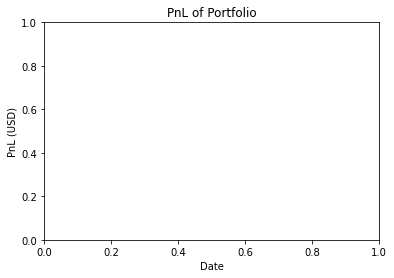

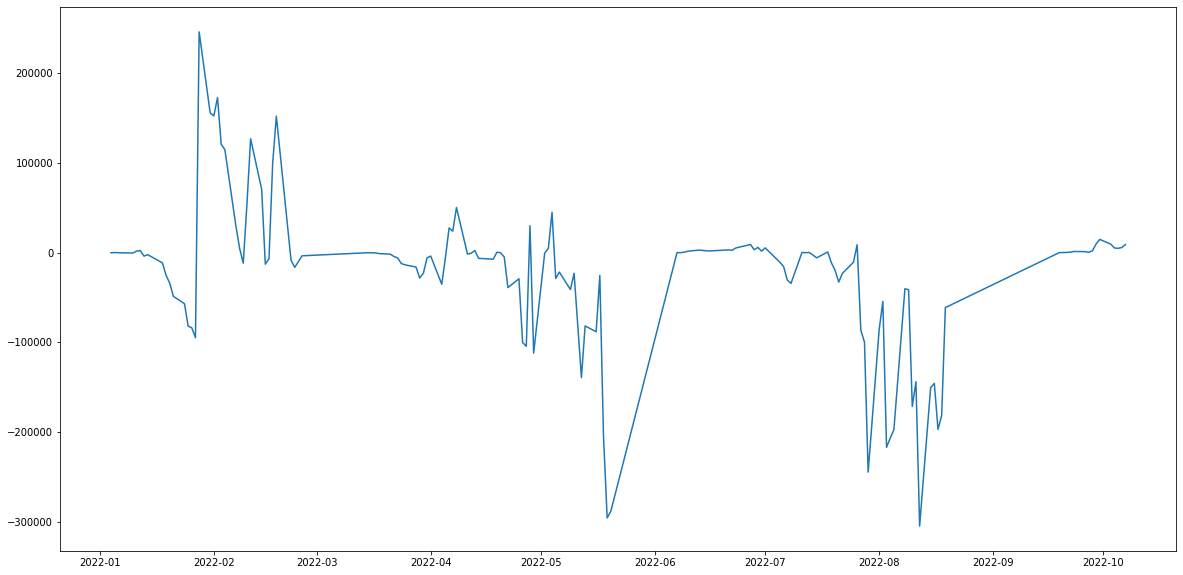

In [344]:
dic = {}
for index, row in xx.iterrows():
  print(f"{row['dte'].to_pydatetime()}, {row['date'].to_pydatetime()}")
  if(row['dte']<datetime(2022,6,10) or row['dte']>datetime(2022,6,25)):
    dic = runDeltaHedge1(row['strike'],row['dte'].to_pydatetime(),row['date'].to_pydatetime(),1,dic)
  # else:
  #   dic = runDeltaHedge1(row['strike'],row['dte'].to_pydatetime(),row['date'].to_pydatetime(),0,dic)
plotPnl(dic)

In [ ]:
def find_best_signal(signal_data):
    cash_long_list = []
    cash_short_list = []
    # entrance
    for i in range(len(closest_options_aapl.index)):
        print(i)
        opt_strike = closest_options_aapl['strike'].iloc[i]
        opt_exp = closest_options_aapl['expiration_date'].iloc[i]
        opt_entry = closest_options_aapl['date'].iloc[i]
        
        cash_long = runDeltaHedge(opt_strike, opt_exp, opt_entry, True, True) # long the straddle
        cash_short = runDeltaHedge(opt_strike, opt_exp, opt_entry, False, True) # short the straddle
        
        cash_long_list.append(cash_long)
        cash_short_list.append(cash_short)
        
    pos_df = pd.DataFrame({'date':dates, 'signal_ratio': signal_ratios, 'cash_long': cash_long_list, 'cash_short': cash_short_list})
    return(pos_df)

pos_df = find_best_signal(signal_ratios)

# pos_df = pd.DataFrame({'signal_ratio': [.3,.7,.1], 'cash_long': [3,7,1], 'cash_short': [6,3,10]})

pos_df_top_long = pos_df[pos_df['cash_long'] > 0].sort_values(by = ['cash_long'], ascending=False)
pos_df_top_short = pos_df[pos_df['cash_short'] > 0].sort_values(by = ['cash_short'], ascending=False)

pos_df_top_long["weight"] = pos_df_top_long['cash_long'] / pos_df_top_long['cash_long'].sum()
pos_df_top_short["weight"] = pos_df_top_short['cash_short'] /  pos_df_top_long['cash_short'].sum()

signal_long = (pos_df_top_long["weight"] * pos_df_top_long["signal_ratio"]).sum()
signal_short = (pos_df_top_short["weight"] * pos_df_top_short["signal_ratio"]).sum()
